In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('SampleSuperstore.csv')

In [4]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [11]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [12]:
df[df["Postal Code"].isnull()]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit


In [13]:
df['Postal Code'] = df['Postal Code'].fillna(5401)

In [14]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [20]:
customers = df.groupby("Segment").sum().sort_values("Sales",ascending=False).head(20)

customers

,Postal Code,Sales,Quantity,Discount,Profit
Segment,,,,,
Consumer,288878609,1.161401e+06,19521,820.91,134119.2092
Corporate,164536330,7.061464e+05,11608,477.85,91979.1340
Home Office,98157713,4.296531e+05,6744,262.33,60298.6785


In [22]:
customers.drop(["Postal Code", "Discount","Quantity","Profit"], axis = 1, inplace = True)

customers.reset_index(inplace = True)

customers

,Segment,Sales
0,Consumer,1.161401e+06
1,Corporate,7.061464e+05
2,Home Office,4.296531e+05


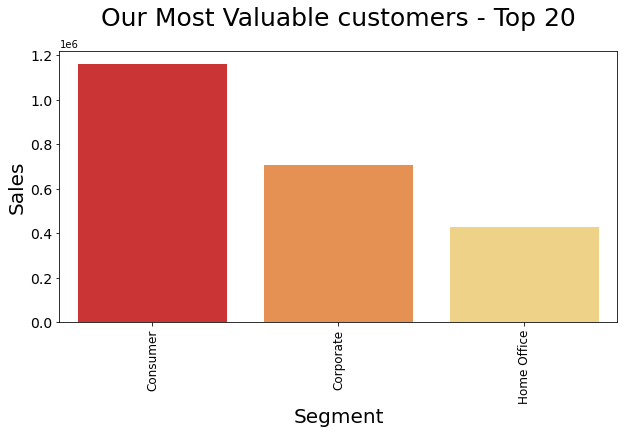

In [23]:
plt.figure(figsize = (10,5))

sns.barplot(x = customers["Segment"],y = customers["Sales"], palette = "YlOrRd_r")

plt.xlabel("Segment", size = 20)

plt.ylabel("Sales", size = 20)

plt.xticks(fontsize=12,rotation=90)

plt.yticks(fontsize=14)

plt.title("Our Most Valuable customers - Top 20", size = 25, pad = 25)

plt.show()